In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
df = pd.read_excel ('./Churn.xlsx')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [119]:
# checking for any NULL values
df.isna().sum()
# TotalCharges contain total 11 NULL values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [120]:
# Coverting churn Yes and No values into int values for further classification and calculation.
df['Churn'].replace ({'Yes': 1, 'No': 0}, inplace=True)

# EDA

<AxesSubplot:>

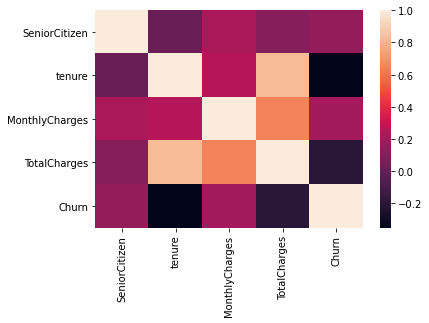

In [121]:
# Used .corr() to draw correlations between various continuous variables in the dataset. Then using a heatmap to represent the relationship.
sns.heatmap(df.corr())
#  As shown in the heatmap Churn, have Correlation with columns MonthlyCharge, SeniorCitizen and not with tenure, TotalCharges.

In [122]:
train_y = df['Churn'].replace ({'Yes': 1, 'No': 0})
train_y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [124]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Selecting every Categorical feature from the dataset

In [125]:
feature =  ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod']

C:\Users\91907\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91907\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91907\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

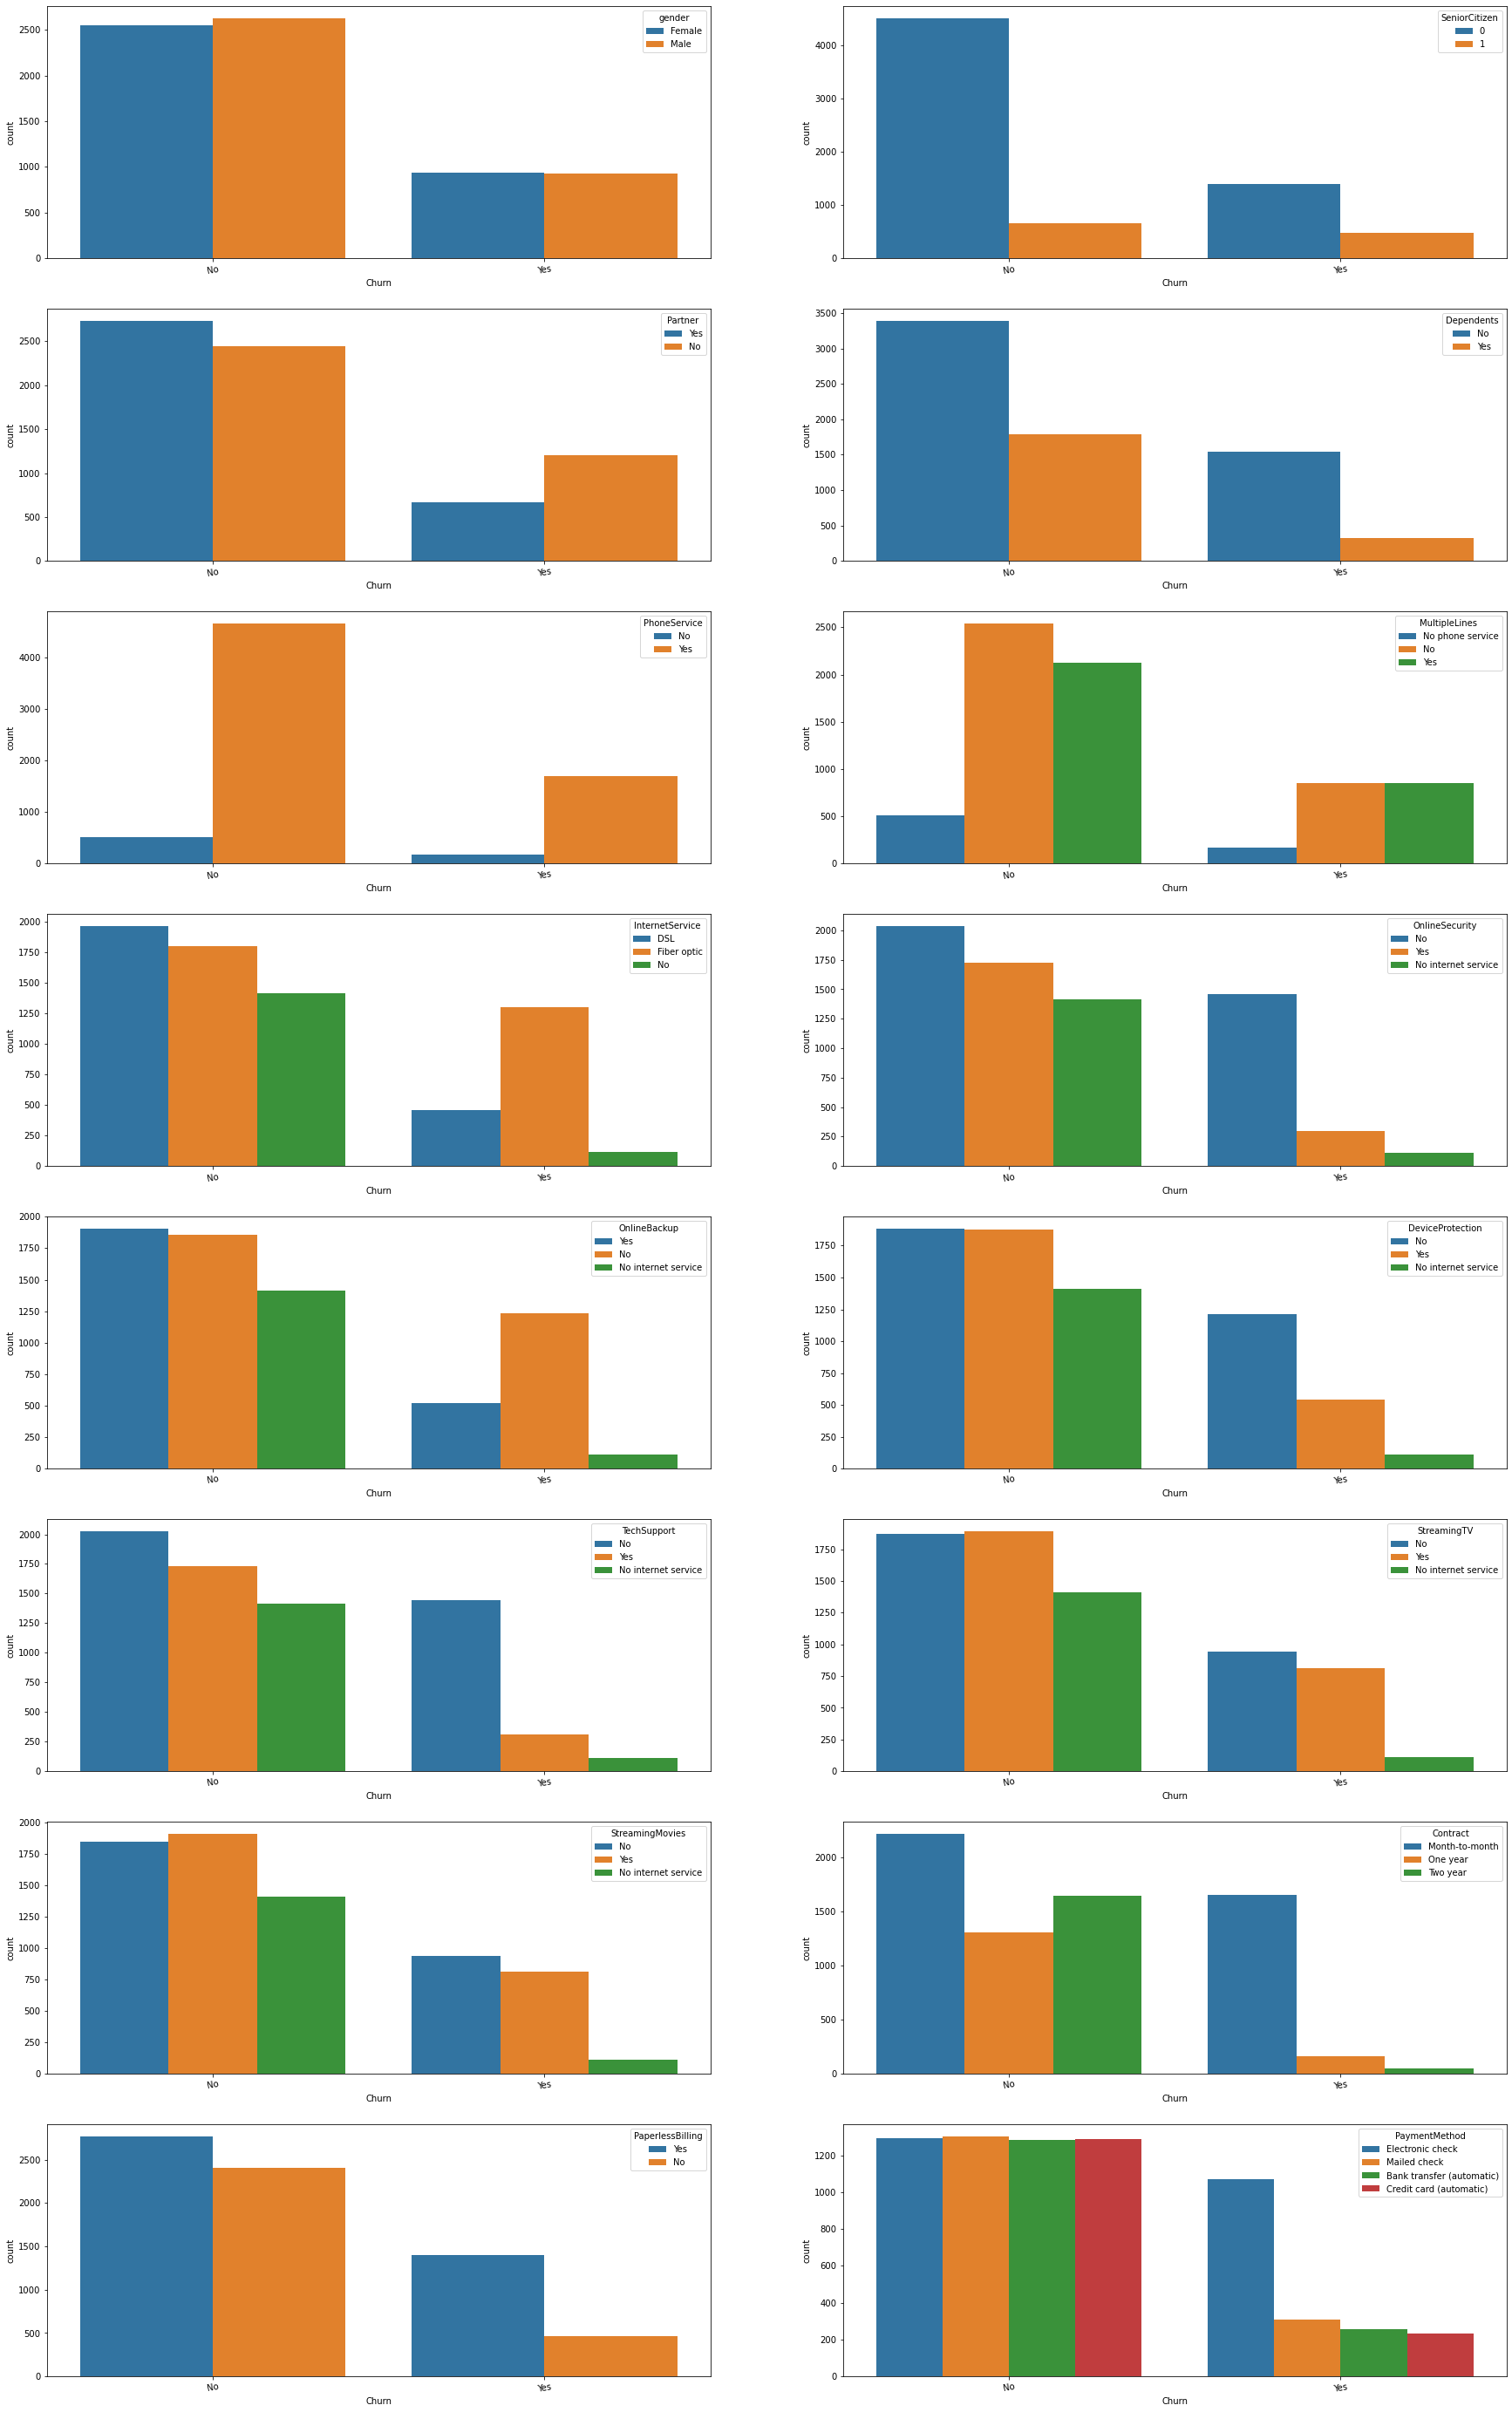

In [126]:
df['Churn'].replace ({1:'Yes', 0:'No'}, inplace=True)
plt.figure(figsize=(30, 50))
for i in enumerate(feature):
    plt.subplot(8, 2, i[0]+1)
    sns.countplot ('Churn', hue = i[1], data = df)
    plt.xticks(rotation = 10)

# Consultion Drawn by ploting categorical data agains Churn 
# Here we are looking for trends in Churn = Yes, where more people tend to leave
# >Gender no major tend
# >SeniorCitizen no major tend
# >Partners tend to say more then non-partners
# >Dependents no major tend
# >PhoneService no major tend
# >MultipleLines no major tend
# >InternetService Churn = Yes, predominantly had Fiber Optics
# >OnlineSecurity Churn = Yes, predominantly had no OnlineSecurity
# >OnlineBackup  Churn = Yes, predominantly had no OnlineBackup
# >DeviceProtection  Churn = Yes, predominantly had no DeviceProtection
# >TechSupport  Churn = Yes, predominantly had no TechSupport
# >StreamingTV no major tend
# >StreamingMovies no major tend
# >Contract Churn = Yes, predominantly had a month-to-month Subscriptions
# >PaperlessBilling no major tend
# >PaymentMethod Churn = Yes, predominantly choose Electronic Check as payment method

# From all the conclusions drawn
# we can say InternetService, OnlineBackup, OnlineSecurity, DeviceProtection, TechSupport, PaymentMethod are technical aspects, people with less technical knowledge or no fimialarity are more likly to leave. 
# Contract, Partners are loyality factors, people who are not partners or have a monthy subscription tends leave more to stay more.

# Features that will be used for training will be
# InternetService, OnlineBackup, OnlineSecurity, DeviceProtection, TechSupport, PaymentMethod, Contract, Partners, MonthlyCharge, SeniorCitizen

In [127]:
# selecting only the required features from the datatset.
selected_features =  ['InternetService', 'OnlineBackup', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'PaymentMethod', 'Contract', 'Partner', 'SeniorCitizen', 'MonthlyCharges']
df = df[selected_features]

# Now we need to process the categorical features into vectors to feed into the Deep learing model.

In [128]:
category_features = ['InternetService', 'OnlineBackup', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'PaymentMethod', 'Contract', 'Partner', 'SeniorCitizen']
non_categorical_features = ['MonthlyCharges']

dummy_df = pd.get_dummies(df, columns = category_features, drop_first=True)

In [129]:
dummy_df

,MonthlyCharges,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,Partner_Yes,SeniorCitizen_1
0,29.85,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,56.95,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
2,53.85,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
3,42.30,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
4,70.70,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0
7039,103.20,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
7040,29.60,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
7041,74.40,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [130]:
train_x = pd.concat([dummy_df, df[non_categorical_features]], axis=1)

In [131]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MonthlyCharges                         7043 non-null   float64
 1   InternetService_Fiber optic            7043 non-null   uint8  
 2   InternetService_No                     7043 non-null   uint8  
 3   OnlineBackup_No internet service       7043 non-null   uint8  
 4   OnlineBackup_Yes                       7043 non-null   uint8  
 5   OnlineSecurity_No internet service     7043 non-null   uint8  
 6   OnlineSecurity_Yes                     7043 non-null   uint8  
 7   DeviceProtection_No internet service   7043 non-null   uint8  
 8   DeviceProtection_Yes                   7043 non-null   uint8  
 9   TechSupport_No internet service        7043 non-null   uint8  
 10  TechSupport_Yes                        7043 non-null   uint8  
 11  Paym

# Spliting data for training and  testing

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (train_x, train_y, test_size = 0.2, random_state = 0)

In [133]:
y_test

2200    0
4627    0
3225    0
2828    0
3768    0
       ..
2631    1
5333    1
6972    1
4598    0
3065    0
Name: Churn, Length: 1409, dtype: int64

# Normalizing the training data

In [134]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [135]:
input_size = x_train.shape

# Model Building

In [136]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow.keras as tf

In [137]:
input_size[1]

19

In [149]:
def build_model():
    model = Sequential ([
        Dense (units = 64, kernel_initializer = 'he_uniform', activation = 'relu', input_dim =input_size[1]),
        Dense (units = 32, activation = 'relu'),
        Dropout (0.7),
        Dense (units = 16, activation = 'relu'),
        Dense (units = 1, activation = 'sigmoid')
    ])
    model.compile (
        loss = 'binary_crossentropy',
        optimizer = 'adam',
        metrics = ['accuracy'])
    return model

In [150]:
model = build_model()

In [151]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 64)                1280      
_________________________________________________________________
dense_70 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 17        
Total params: 3,905
Trainable params: 3,905
Non-trainable params: 0
_________________________________________________________________


# Training Model 

In [152]:
hist = model.fit (x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 32)

Epoch 1/10
177/177 [==============================] - 3s 11ms/step - loss: 0.5826 - accuracy: 0.6836 - val_loss: 0.4817 - val_accuracy: 0.7644
Epoch 2/10
177/177 [==============================] - 2s 9ms/step - loss: 0.4838 - accuracy: 0.7514 - val_loss: 0.4599 - val_accuracy: 0.7814
Epoch 3/10
177/177 [==============================] - 2s 10ms/step - loss: 0.4788 - accuracy: 0.7528 - val_loss: 0.4614 - val_accuracy: 0.7807
Epoch 4/10
177/177 [==============================] - 2s 10ms/step - loss: 0.4571 - accuracy: 0.7649 - val_loss: 0.4575 - val_accuracy: 0.7821
Epoch 5/10
177/177 [==============================] - 2s 10ms/step - loss: 0.4573 - accuracy: 0.7718 - val_loss: 0.4552 - val_accuracy: 0.7871
Epoch 6/10
177/177 [==============================] - 2s 10ms/step - loss: 0.4375 - accuracy: 0.7773 - val_loss: 0.4560 - val_accuracy: 0.7821
Epoch 7/10
177/177 [==============================] - 2s 10ms/step - loss: 0.4435 - accuracy: 0.7796 - val_loss: 0.4602 - val_accuracy: 0.7814


# Model have a test accuracy is constantly around 78%

# Plot Metrics (loss, accuracy)

In [153]:
def plot_graph(hist, metric):
    plt.plot(hist.history[metric])
    plt.plot(hist.history['val_'+metric])
    plt.title('model'+metric)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc = 'upper right')

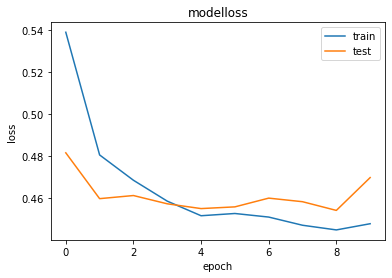

In [154]:
plot_graph(hist = hist, metric = 'loss')

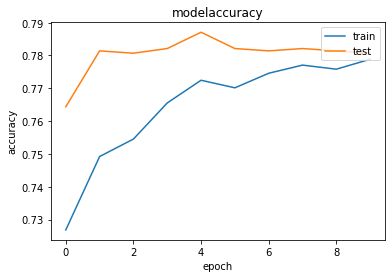

In [155]:
plot_graph(hist = hist, metric = 'accuracy')